# Leo's Individual EDA 
____

**In this notebook, we will be analysing the national dataset in 3 parts:**
    
        1. Initial Observations

        2. Data Filtering & Observations

        3. Anlysis & Visualisations


**Research Questions:**

    - RQ1: What are the most popular names in US for males and females? what is the ratio of male to female names? 
        Is there a trend in the ratio of female to male birth rates over the years? Are there differences in volatility between both genders?

    - RQ2: What are the top 10 names of all time? How has their popularity changed over the years? Is there a trend in the name choices over time? 
        which names have had the biggest spikes/drops in popularity over time? 


**EDA Outline:**
    
    
    Part 1: Initial Observations

        1.1: Data Loading and proccessing
        
        1.2  Data Analysis


    Part 2: Data Filtering & Visualisations 

        2.1: Filtering top names by gender

        2.2: Counting number of unique names each year

        2.3: Track top 10 names over each year

            
    Part 3: Visualisations and analysis

        - Visualisation 1: Top 5 Names By Gender Chart:

        - Visualisation 2: Most popular name per decade

        - Visualisation 3: Female and Male births per year

        - Visualisation 4: Female and Male unique names per year

        - Visualisation 5: Occurences of the top 10 names of all time per year

        3.1: Research question 1 analysis

        3.2: Research question 2 analysis

        3.3: Final Conclusion

    



___
# Part 1: Initial Observations

## 1.1 Data Loading and proccessing:


In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [31]:
# Loading and processing the full national dataset
national_df = pf.load_and_process_one_national('../../data/raw/national/NationalNames.csv')
national_df

,Name,Year,Gender,Count
0,Mary,1880,F,7065
1,Anna,1880,F,2604
2,Emma,1880,F,2003
3,Elizabeth,1880,F,1939
4,Minnie,1880,F,1746
...,...,...,...,...
1825428,Zykeem,2014,M,5
1825429,Zymeer,2014,M,5
1825430,Zymiere,2014,M,5
1825431,Zyran,2014,M,5


## 1.2  Variable Analysis:

In [288]:
national_df.shape

(1825433, 4)

As shown, the national dataframe has just under 2 million rows and 4 columns which consist of...

In [289]:
national_df.columns

Index(['Name', 'Year', 'Gender', 'Count'], dtype='object')

The data set has 5 variables:

        Name : baby names from 1880 where the name has between 2-15 characters and more than 5 occurences 

        Year : Birth year (YYYY)

        Gender : gender of the baby (M or F)

        Count : total number of occurences of the name 

The data is sorted first by gender, then by name occurence in descending order, When there is
a tie on the number of occurrences, names are listed in alphabetical order.

Datatypes of each variable are shown below:


In [290]:
national_df.dtypes

Name      object
Year       int64
Gender    object
Count      int64
dtype: object

### categorical data analysis:

In [291]:
national_df.describe(include=[object]).T

,count,unique,top,freq
Name,1825433,93889,Marion,270
Gender,1825433,2,F,1081683


- Out of the 1825433 readings, there are 93889 unique names 

- There are more female readings than male readings, However, this does not mean that there are more female names than male names

- The frequency column does not account for the **count** varaible, therefore the top and freq columns can be ignored (Marion is not the top name)

In [292]:
national_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1825433.0,1972.619783,33.528912,1880.0,1949.0,1982.0,2001.0,2014.0
Count,1825433.0,184.687921,1566.710979,5.0,7.0,12.0,32.0,99680.0


- The year variable does not provide any usefull information 

- The count tells us that the average occurence of a random name in the US is 184, and the most frequent name has 99680 occurences 

___
# Part 2: Data Filtering

## 2.1 Filtering top names by gender:

In [73]:
# Top 5 names 
top_names = national_df.sort_values(ascending=False,by=['Count'])
top_names.head()

,Name,Year,Gender,Count
431052,Linda,1947,F,99680
441424,Linda,1948,F,96205
437157,James,1947,M,94755
544602,Michael,1957,M,92709
437158,Robert,1947,M,91642


In [86]:
# Top 5 male names 
top_male = national_df.loc[national_df['Gender'] == 'M'].sort_values(ascending=False, by=['Count'])
top_male.head()

,Name,Year,Gender,Count
437157,James,1947,M,94755
544602,Michael,1957,M,92709
437158,Robert,1947,M,91642
533139,Michael,1956,M,90633
556176,Michael,1958,M,90519


In [75]:
# Top 5 female names 
top_female = national_df.loc[national_df['Gender'] == 'F'].sort_values(ascending=False,by=['Count'])
top_female.head()

,Name,Year,Gender,Count
431052,Linda,1947,F,99680
441424,Linda,1948,F,96205
451659,Linda,1949,F,91010
461921,Linda,1950,F,80431
180215,Mary,1921,F,73985


As can be seen, there are a lots of duplicates in the top names. However, each entry with the same name has a different year and therefore we canno't remove duplicate names, so instead, we will combine the occurences of names in the top 5 So that they only take up one row in the dataframe.

In [76]:
# Combining duplicate entries
top_5_names = top_names.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()
top_5_male = top_male.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()
top_5_female = top_female.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()

In [154]:
# Top 5 female names 
top_5_female

,Name,Gender,Year,Count
40387,Mary,F,262845,4115282
18089,Elizabeth,F,262845,1601128
46834,Patricia,F,255319,1570567
26781,Jennifer,F,190700,1462742
36526,Linda,F,262845,1450843


In [17]:
#top 5 names 
top_5_names

,Name,Gender,Year,Count
41488,James,M,262845,5105919
46150,John,M,262845,5084943
80438,Robert,M,262845,4796695
67713,Michael,M,262845,4309198
65487,Mary,F,262845,4115282


In [143]:
# Top 5 male names 
top_5_male

,Name,Gender,Year,Count
16388,James,M,262845,5105919
18397,John,M,262845,5084943
30763,Robert,M,262845,4796695
25820,Michael,M,262845,4309198
37547,William,M,262845,4055473


By regrouping duplicate entries, the data has significantly changed. From the female top names, it looked like Linda was the most popular name by a far, but now we see that it is actually the 5th most popular name. This is due to Linda having less entries with higher count values, but in fact Mary has the most total count values. 


## 2.2: Computing the number of unique names each year for both genders:

In [124]:
# Grouping names by year and computing the number unique names for each year 
unique_names = national_df.groupby(['Year','Gender'],as_index=True).aggregate({'Name': 'nunique'}).rename({'Name':'Unique'},axis=1)
unique_names

Unique
Year Gender        
1880 F          942
     M         1058
1881 F          938
     M          997
1882 F         1028
...             ...
2012 M        14216
2013 F        19191
     M        14012
2014 F        19067
     M        13977

[270 rows x 1 columns]

## 2.3: Tracking occurences of top 10 names in each year

- The goal is to render a dataframe where we have each individual year plotted against the top 10 names in (1180-2014) so that we can see the occurence counts for each name for any specific year.

- We will do so by grouping the data by name and year variables and creating a pivot table with year as index values and the top 10 names as the columns


In [9]:
# Proccessing the dataframe to track only the top 10 names, for each year

# Initialising a list of the top 10 names 
top_10_names = national_df.drop(columns='Gender').groupby(['Name'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count']).head(10)
name_list = list(top_10_names['Name'])

# Cleaning dataframe to only show top 10 names of all time, and there count values for each year 
df_cleaned = national_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
df_cleaned = df_cleaned.loc[(df_cleaned['Name'] == name_list[0]) |
                            (df_cleaned['Name'] == name_list[1]) |
                            (df_cleaned['Name'] == name_list[2]) |
                            (df_cleaned['Name'] == name_list[3]) |
                            (df_cleaned['Name'] == name_list[4]) |
                            (df_cleaned['Name'] == name_list[5]) |
                            (df_cleaned['Name'] == name_list[6]) |
                            (df_cleaned['Name'] == name_list[7]) |
                            (df_cleaned['Name'] == name_list[8]) |
                            (df_cleaned['Name'] == name_list[9]) 
                        ]
# Initializing a pivot table with year as the index and names as colummns  
pivot_table = df_cleaned.pivot(index='Year',columns='Name',values='Count')
pivot_table

Name,Charles,David,James,John,Joseph,Mary,Michael,Richard,Robert,William
Year,,,,,,,,,,
1880,5359,869,5949,9701,2642,7092,354,728,2426,9562
1881,4653,750,5466,8795,2466,6948,298,641,2149,8554
1882,5115,838,5910,9597,2676,8178,321,746,2512,9329
1883,4844,741,5249,8934,2532,8044,307,649,2345,8427
1884,4821,761,5726,9428,2717,9253,373,749,2476,8931
...,...,...,...,...,...,...,...,...,...,...
2010,7098,14196,13881,11549,13814,2862,17345,3233,7551,17053
2011,6981,13213,13257,11041,12941,2701,16780,3157,6961,17342
2012,6934,12512,13413,10604,12519,2571,16133,3016,6933,16863


- The resulting dataframe is quite difficult to read or analyse but will be usefull to create visualisations later on. From this data, we should be able to plot a line chart showing the changes of name popularity over time 

### Data processing functions:

In [65]:
# data processing functions 

# Method to get the top names based on decade and gender (move to project_functions)
def get_top_names_byDec_gender(dataframe,decade,gender,num_of_names):
    df_filtered = dataframe.loc[   (dataframe['Year'] >= decade) & 
                                    (dataframe['Year'] < decade+10) & 
                                    (dataframe['Gender'] == gender) 
                                ]
    df_cleaned = df_filtered.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head(num_of_names)
    return df_cleaned

def get_top_names_byDec(dataframe,decade,num_of_names):
    df_filtered = dataframe.loc[(dataframe['Year'] >= decade) & (dataframe['Year'] < decade+10)]
    df_cleaned = df_filtered.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head(num_of_names)
    return df_cleaned

def get_top_names_byYear(dataframe,year,num_of_names):
    df_filtered = dataframe.loc[(dataframe['Year'] == year)]
    df_cleaned = df_filtered.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head(num_of_names)
    return df_cleaned


# returns a dataframe with the top name for each decade filtered by gender
def get_top_name_foreachDec_gender(dataframe,gender):

    data = []
    for year in range(1880,2011,10):
        data.append([year,get_top_names_byDec_gender(dataframe,year,gender,1).iloc[0]['Name'],
                        get_top_names_byDec_gender(dataframe,year,gender,1).iloc[0]['Count']]
                    )


    df = pd.DataFrame(data, columns = ['Decade','Name', 'Count'])
    return df

# returns a dataframe with the top name for each decade
def get_top_name_foreachDec(dataframe):

    data = []
    for year in range(1880,2011,10):
        data.append([year,get_top_names_byDec(dataframe,year,1).iloc[0]['Name'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Gender'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Count']]
                    )


    df = pd.DataFrame(data, columns = ['Year','Name', 'Gender','Count'])
    return df

# returns the top name for each year for each gender
def get_top_name_foreachYear_male_female(dataframe):

    data = []
    for year in range(1879,2014):
        data.append([year,get_top_names_byDec_gender(dataframe,year,'F',1).iloc[0]['Name'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Gender'],
                        get_top_names_byDec_gender(dataframe,year,'F',1).iloc[0]['Count']]
                    )


    df_m = pd.DataFrame(data, columns = ['Decade','Name','Gender','Count'])

    for year in range(1879,2014):
        data.append([year,get_top_names_byDec_gender(dataframe,year,'M',1).iloc[0]['Name'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Gender'],
                        get_top_names_byDec_gender(dataframe,year,'M',1).iloc[0]['Count']]
                    )


    df_f = pd.DataFrame(data, columns = ['Year','Name','Gender', 'Count'])
    merged_df = df_f.merge(df_m,how='outer')

    return merged_df

# returns a dataframe with the top name for each year
def get_top_names_foreachYear(dataframe,num_of_names):

    data = []
    for year in range(1879,2015):
        data.append([year,get_top_names_byYear(dataframe,year,num_of_names).iloc[0]['Name'],
                        get_top_names_byYear(dataframe,year,num_of_names).iloc[0]['Count']]
                    )


    df = pd.DataFrame(data, columns = ['Year','Name', 'Count'])
    return df

___
# Part 3: Visualisations and Analysis



In [142]:
# initializing dataframes for visualisation

# top name per decade
top_perDec = get_top_name_foreachDec(national_df)

# top male name per decade
top_male_perDec = get_top_name_foreachDec_gender(national_df,'M')

# top female name per decade
top_female_perDec = get_top_name_foreachDec_gender(national_df,'F')

# top name per year 
merged_df = get_top_name_foreachYear_male_female(national_df)


## Visualisation 1: Top 5 Names By Gender Chart:

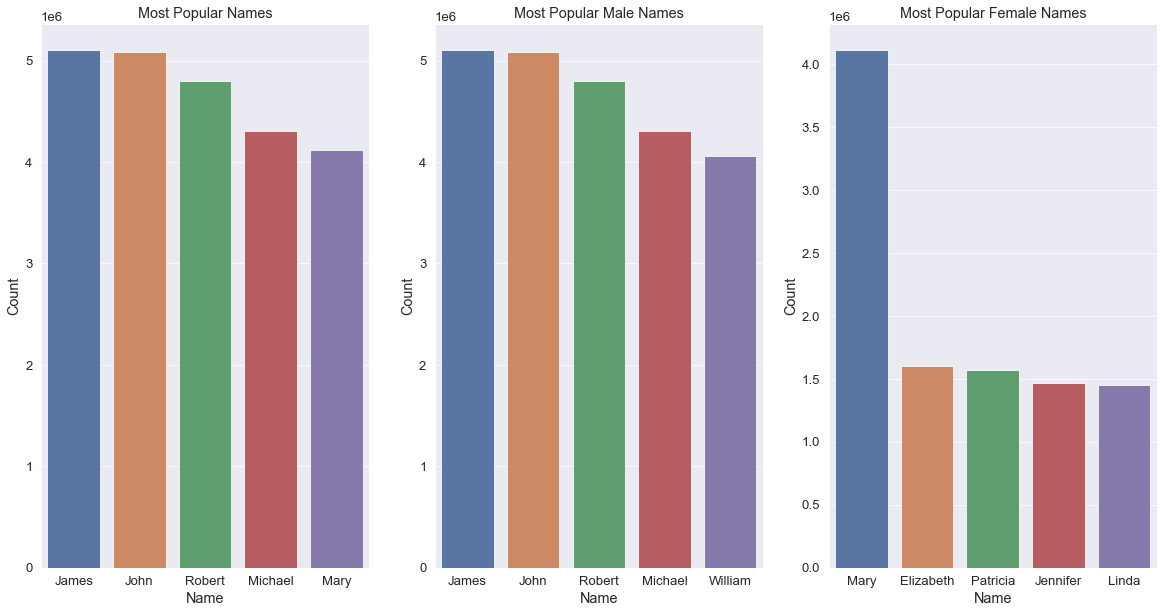

In [134]:
sns.set_theme(context="paper",  font_scale=1.5, )
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

# total graph
all_names = sns.barplot(y="Count",
            x="Name",
            data=top_5_names,
            ax=ax[0])
all_names.set_title("Most Popular Names")

# male graph
male = sns.barplot(y="Count",
            x="Name",
            data=top_5_male,
            ax=ax[1])
male.set_title("Most Popular Male Names")

# total graph
female = sns.barplot(y="Count",
            x="Name",
            data=top_5_female,
            ax=ax[2])

female.set_title("Most Popular Female Names")
plt.show()

### Observations: 

- The first observation made is that the top 5 names is almost identical to the top male names excluding Mary 

- We see a much larger average value in the male names than the female names 

- The male name values are relatively close compared to the female values which are much more dispersed

- we see a very large gap between the first and second female name 

- **Mary** was an exeptionally popular name for females

- This visualisation suggests that male names are much more common than female names. This could mean that female names are more unique or simply that there were more male then female birth during the specified timeframe. To verify this assumption, lets go back to the full dataset and find the ratio of male to female names.




In [175]:
# Finding the total number of male names
index = top_male.index
num_of_male_names = len(index)

# Finding the total number of female names
index = top_female.index
num_of_female_names = len(index)

print("Number of male names:", num_of_male_names, "\n\nNumber of female names:",num_of_female_names,"\n\nRatio (female/male) =",'{0:.3g}'.format((num_of_female_names/num_of_male_names)))

Number of male names: 743750 

Number of female names: 1081683 

Ratio (female/male) = 1.45


As shown, there are 1.45 more female names than male names. This implies that the female dataset is much more dispersed than the male dataset. To confirm this, lets calculate the standard deviation.

In [188]:
print("Male names standard deviation:",'{0:.6g}'.format(top_male.groupby(['Name','Gender'],as_index=False).agg(sum)['Count'].std()))
print("\nFemale names standard deviation:",'{0:.6g}'.format(top_female.groupby(['Name','Gender'],as_index=False).agg(sum)['Count'].std()))

Male names standard deviation: 73254.9

Female names standard deviation: 34391.1


Contrary to what was predicted, the male standard deviation is much higher. Thus, the male dataset is more spread out meaning that the top male names are exponentially more common than the bottom male names whereas the female names are much more similar in popularity. The name "Mary" is an outlier as it is twice as common as the second most common name. In summary, female names are more unique and more similar in popularity, whereas male names are more general, popular names are very popular and unpopular names are very unpopular

## Visualisation 2: Most Popular Name Per Decade 

In [141]:
sns.set_theme(context="paper",  font_scale=1.5, )
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

# Most Popular male name per decade graph
Chart2 = sns.barplot(y="Count",
            x="Decade",
            data=top_perdec,
            hue="Name")
Chart2.set_title("Most Popular Name Per Decade")
plt.show()

NameError: name 'top_perdec' is not defined

### Observations: 

- Here we see that **Mary** was very popular from **1880-1920**, in fact it was the top name of the decade for all 5 decades

- Michael was also the top name for 4 decades in a row

- This implies that there are trends of popularity over certain timeframes

## Visualisation 3: Female and Male births per year

In [47]:
ratio_df = national_df.groupby(['Year','Gender'],as_index=False).agg(sum)

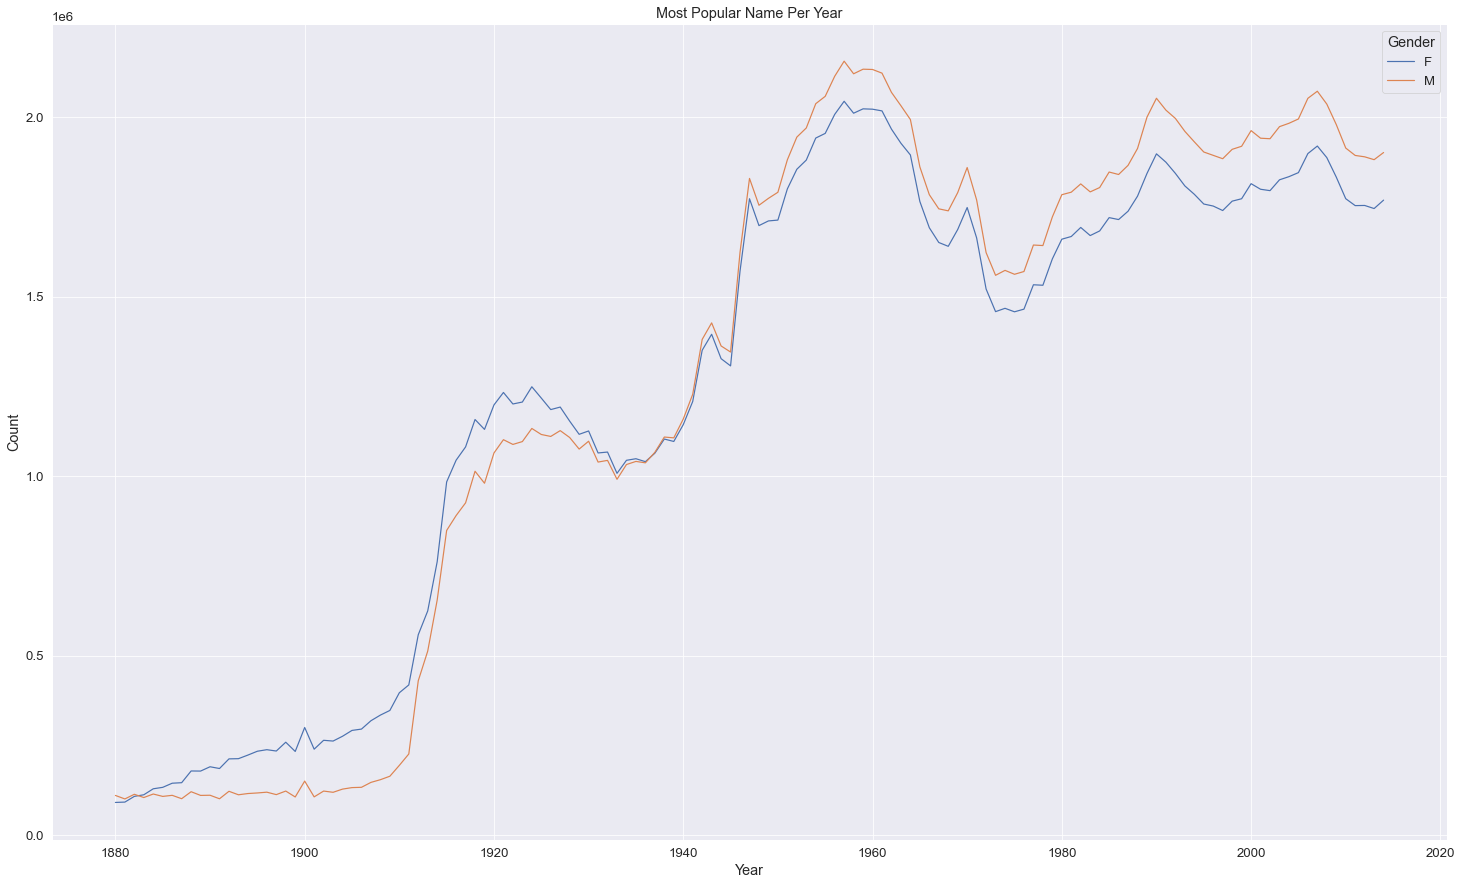

In [5]:
sns.set_theme(context="paper",  font_scale=1.5, )
fig, ax = plt.subplots(nrows=1, figsize=(20,10))
# Most Popular male name per decade graph
Chart3 = sns.lineplot(y="Count",
            x="Year",
            data=ratio_df,
            hue="Gender")
Chart3.set_title("Female and Male births per year")
plt.show()

## Observations:

- Here we see that the number of male to female births each relatively similar.

- We generally see more female births each year in 1880-1940, and more male names births every single year from **1950-2014**, however the difference between both genders stays relatively small throughout the entire timeframe, therefore there arn't any significant visible trends.

- The contsant increase in count shows implies that the population has increased over time

## Visualisation 4: Female and Male unique names per year

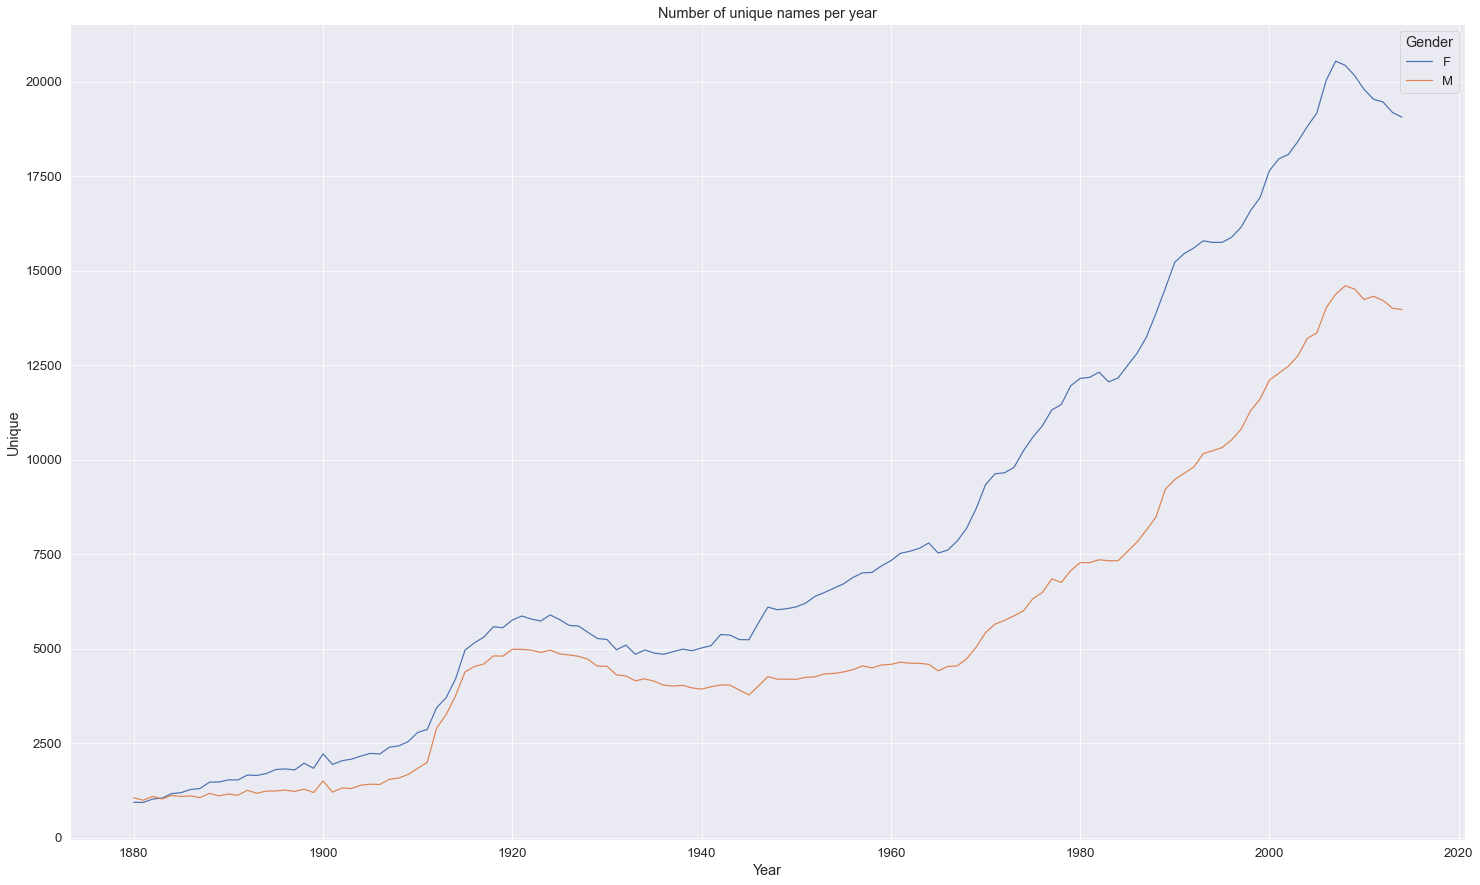

In [125]:
sns.set_theme(context="paper",  font_scale=1.5, )
fig, ax = plt.subplots(nrows=1, figsize=(20,10))
# Most Popular male name per decade graph
Chart3 = sns.lineplot(y="Unique",
            x="Year",
            data=unique_names,
            hue="Gender")
Chart3.set_title("Number of unique names per year")
plt.show()

## Observations: 
- This confirms our previous speculations that there are more unique female names than male, this is true for almost every single year over the entire timeframe 

- This also explains why male counts are usually higher

- We notice that the difference between genders increases after **1940**

- This explains our previous observation of visualisation 3; that after **1940**, the most popular names are all male 

- Prior to **1940**, the difference is smaller, and thus very popular female names such as Mary can be the most popular name

- the constant increase also shows increase in population

## Visualisation 5: Occurences of the top 10 names of all time per year

In [130]:
# Cleaning data so that each row is a seperate entry
tidy = pivot_table.stack().reset_index().rename(columns={"level_1": "Name", 0: "Count"})
tidy

,Year,Name,Count
0,1880,Charles,5359
1,1880,David,869
2,1880,James,5949
3,1880,John,9701
4,1880,Joseph,2642
...,...,...,...
1345,2014,Mary,2616
1346,2014,Michael,15358
1347,2014,Richard,2857
1348,2014,Robert,6578


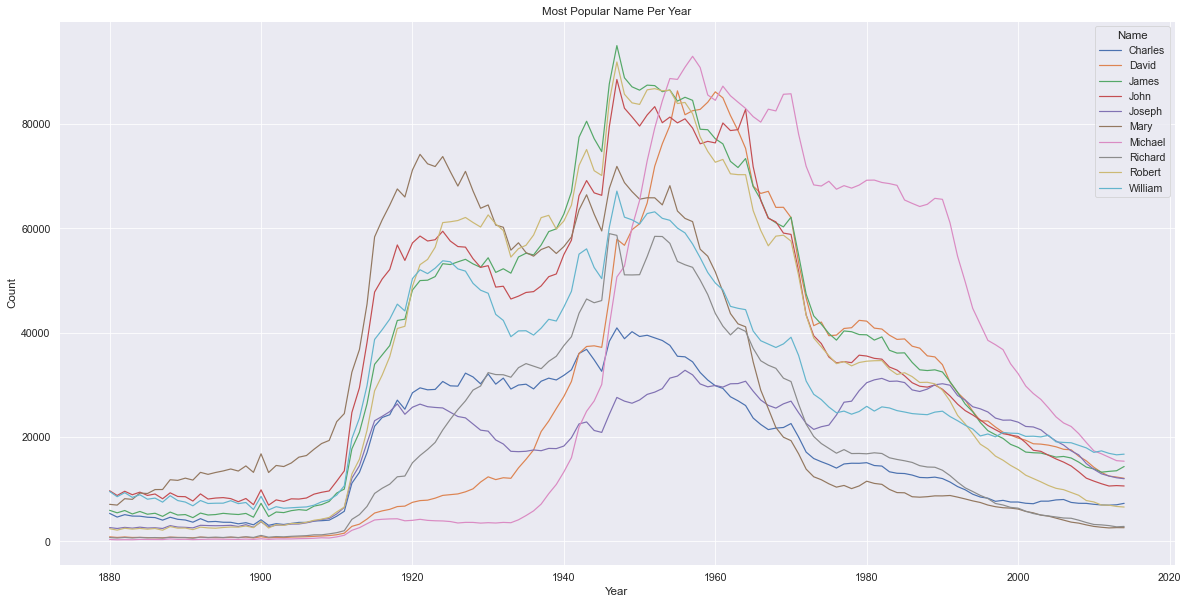

In [131]:
# Plotting the pivot table from section 2.2
sns.set_theme(context="paper", style="darkgrid", font_scale=1.2,)
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

Chart4 = sns.lineplot(data=tidy,
            x="Year",
            y='Count',
            hue='Name')
Chart4.set_title("Top 10 names of all time")
plt.show()

### observations:
- This graph shows the variation in popularity of the top 10 names over the timeframe, however it is difficult to speculate the change over time as the data seems distorted due to the change in poppulation. Hence, we will convert the count value to percentage

In [132]:
# Converting count values to percentages 

df_count = tidy.groupby(['Year'],as_index=True).agg(np.sum)
df_count

for year in range(1880,2015):
    for i in range(0,1350):
        if (tidy.loc[i,'Year'] == year):
            tidy.loc[i,'Count'] = (tidy.loc[i,'Count'] / df_count.loc[year,'Count'])
tidy

,Year,Name,Count
0,1880,Charles,0.119936
1,1880,David,0.019449
2,1880,James,0.133141
3,1880,John,0.217112
4,1880,Joseph,0.059129
...,...,...,...
1345,2014,Mary,0.026042
1346,2014,Michael,0.152889
1347,2014,Richard,0.028441
1348,2014,Robert,0.065484


## Visualisation 5: Occurences of the top 10 names of all time per year

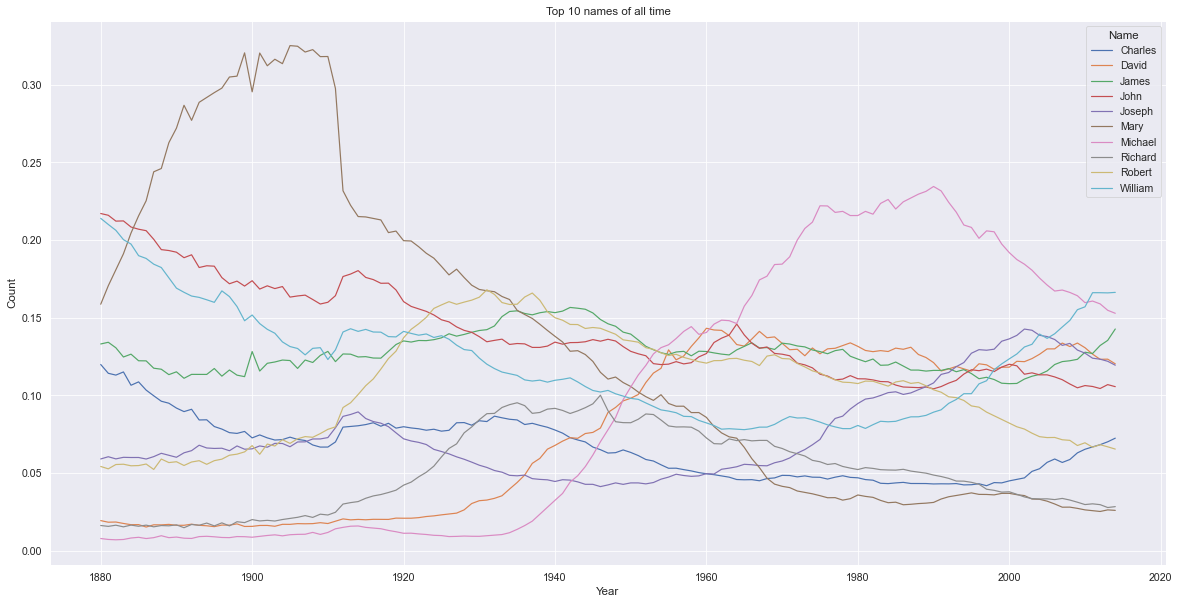

In [133]:
# Plotting the pivot table from section 2.2
sns.set_theme(context="paper", style="darkgrid", font_scale=1.2, )
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

Chart4 = sns.lineplot(data=tidy,
            x="Year",
            y='Count',
            hue='Name')
Chart4.set_title("Top 10 names of all time")
plt.show()

## Observations: 
- This graph gives us a better view of the change in popularity over time 

- we speculate that **Mary** had an exponential spike in popularity in 1880, it peaked at around 1900 at a value of 0.30% which is the highest popularity reached by any name in the entire dataset. In around 1910, its popularity started to drop continuously until it becomes the least popular name. This is interesting as although **Mary** has a relatively low popularity from 1960 to 2014, its peak in the 1800s still makes it the most popular female name of all time to this day.

- **Michael** had a low popular in the 1800s and 1900s but started to increase in 1940 and eventually became the most popular name in 1960-2010. This confirms our speculation of *visualisation 2* where michael was the most popular name in all 4 decades from 1960-1990. However, in 1990-2014 **Sophia** and **Jacob** were the most popular names which are both not in the top 10 names of all time. This implies that these names have recently gained popularity and were less popular in earlier years. 

- This is interesting as we see that most of the names in the top 10 are names which have somewhat maintained their popularity over the whole time-frame appart from a few exeptions such as **Michael**, **David**, **Joseph** and **Mary**.



## Research Question 1 analysis:

What are the most popular male and female names? what is the ratio of male to female names? 
Is there a trend in the ratio of female to male birth rates over the years? Are there differences in volatility between both genders?

___


We have successfully found the top 5 names in the US for both males and females, and speculated that the top names without gender filtering were almost identical to the top male names **(visualisation 1)**. We then found the ratio of female to male births for each year and concluded that were no visible trends **(visualisation 3)**. We then found the number of male and female unique names for each year and speculated that from 1920 onwards there were significantly and increasingly more female names than male names **(visualisation 4)**. We also calculated the standard deviation for both sets and found that the male significantly higher implying that the male count values are more dispered. We concluded that female names have become more unique over time whereas male names are more common meaning that female names are more similar in popularity whereas top male names are exponentially more popular than the rest.





## Research Question 2:

 What are the top 10 names of all time? How has their popularity changed over the years? Is there a trend in the name choices over time? 
        which names have had the biggest spikes/drops in popularity over time? 

___

We have successfully found the most popular name for each decade **(Visualisation 2)** aswell as top 10 names of all time and their change in popularity over the years **(Visualisation 5)**. We have found various trends in name choices over time such as the name **Mary** which had an exponential spike in popularity in the 1800s and dropped throughout the 1900s. On the contrary, we found that the name **Michael** was very unpopular in 1800s and started to gain popularity around 1940 and eventually became the most popular male name for 4 decades in a row .We concluded that the most popular names mainly depend on time period, as we see that top names will usually gain popularity over a few decades and eventually drop. In other words, names only keep their popularity for a certain amount of time, the top names in 2014 are completely different from the top names in 1880. We have also found that the in general the most popular names of all time are names which have maintained their popularity for a longer time even though they may not neccessarily have been one of the top names at that time. Naturally, there are also outliers such as **Michael** or **Mary** which have had such exponential spikes in popularity that they have become some of the most popular names of time. 

       
    
